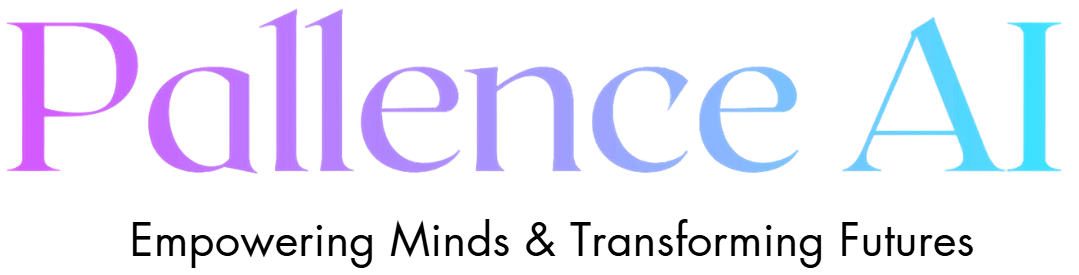

In [15]:
from IPython.display import Image, display
display(Image("./images/PallenceAI-Final.png", width=800))

# Project 1: Lets build an Image Classifier Model on Fashion_Mnist Dataset

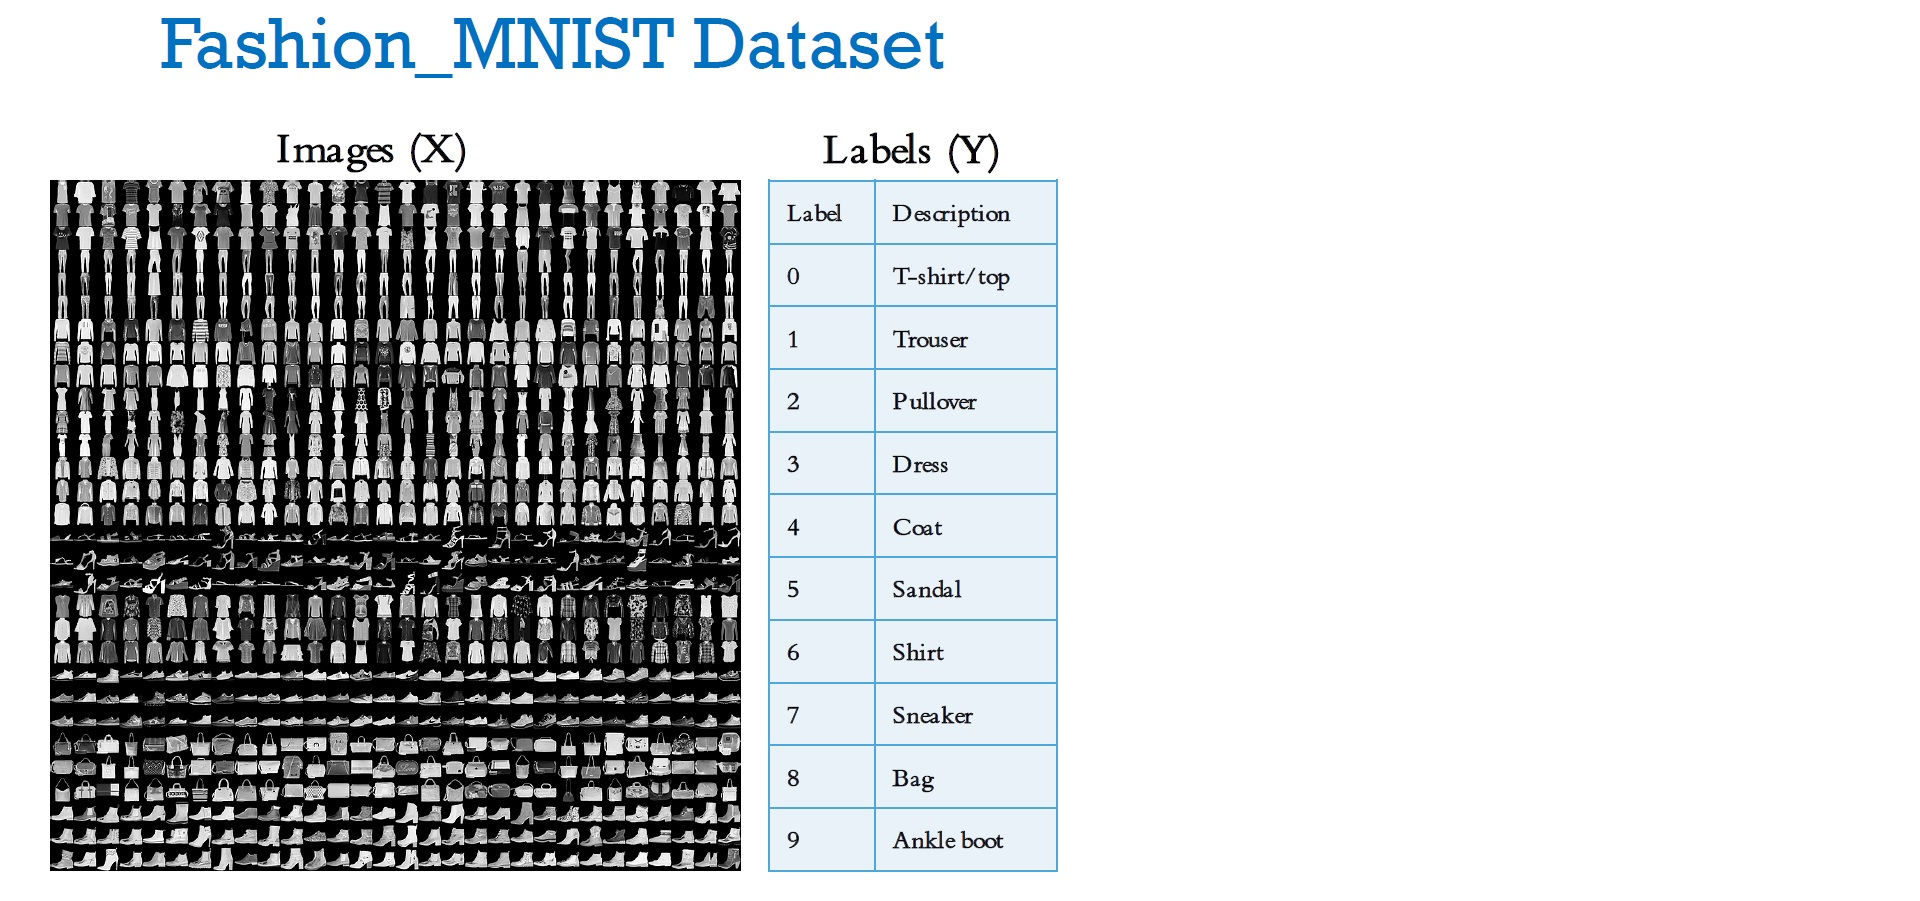

In [3]:
display(Image("./images/fashion_mnist.jpg", width=800))

## Import needed libraries 

In [12]:
#### IF you are using Google colab only please do the following to make it easy to work in colab. 
# Uncomment and run cells in colab

# 1. Mount ur google drive where the course folder is downloaded.
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Set the path to the course directory
# import os
# os.chdir('/content/drive/My Drive/Course-1-Deep-Learning-Mastery-Build-Your-AI-Foundation-main/Section4')
# print("Current Directory:", os.getcwd())

# 3. install the following libraries. u can install any other library also with !pip install "library"
# !pip install tensorflow numpy pandas matplotlib

In [1]:
#Basic Python packages for data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Tensorflow & Keras related packages
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Load Fashion MNIST Dataset Preloaded in Keras

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Understanding the Data 

In [4]:
type(train_images)

numpy.ndarray

In [5]:
train_images.shape # There are 60000 images in the training data. Each image is a 28 x 28 gray scale image

(60000, 28, 28)

In [6]:
train_labels.shape # 60000 labels corresponding to each image

(60000,)

In [7]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train_images[0:5,10:14,10:14] # Taking a look at some Pixel values of first 5 images
# the values filled in this 28 x 28 arrays are pixel values between 0 to 255.

array([[[  0,   0,   0, 193],
        [  3,   0,  12, 219],
        [  6,   0,  99, 244],
        [  0,   0,  55, 236]],

       [[252, 250, 248, 245],
        [208, 192, 197, 200],
        [214, 203, 206, 204],
        [212, 202, 206, 205]],

       [[ 87,  87,  85,  88],
        [ 88,  87,  87,  88],
        [ 87,  87,  87,  87],
        [ 87,  87,  87,  87]],

       [[129, 112, 104, 114],
        [135, 129,  98, 100],
        [135, 127, 100, 108],
        [129, 110, 100,  91]],

       [[216, 214, 217, 216],
        [216, 214, 216, 217],
        [216, 214, 217, 220],
        [216, 215, 218, 222]]], dtype=uint8)

In [9]:
train_labels[0:5] # Looking at the labels for the first 5 images

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
# In test data we have 10k examples. 
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

**Lets take a peek at few images to see what they are**

In [12]:
# 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat"
# 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8: "Bag", "9:Ankle boot"

#Lets look at the labels
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

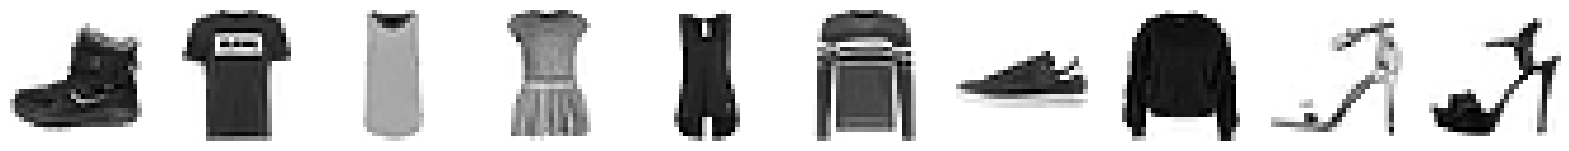

In [13]:
#Lets take a peek at the first 10 images in the training data set
plt.figure(figsize=(20,3))
for i in range(10):
    _ = plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i].astype("float32"), cmap="gray_r")
    plt.axis("off")

## Train a simple Deep Learning Model for Classifying Fashion Images -  9 Lines of code

In [14]:
# train_images = train_images.reshape((60000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
# train_images = train_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]
# test_images = test_images.reshape((10000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
# test_images = test_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]

# model = keras.Sequential() # Start building a sequential keras model
# model.add(layers.Dense(512,activation='relu')) # Add first layer with 512 Hidden Units, and use Relu for nonlinear activation
# model.add(layers.Dense(10,activation = "softmax")) # Last output layer which will be softmax classification.

# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

# model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

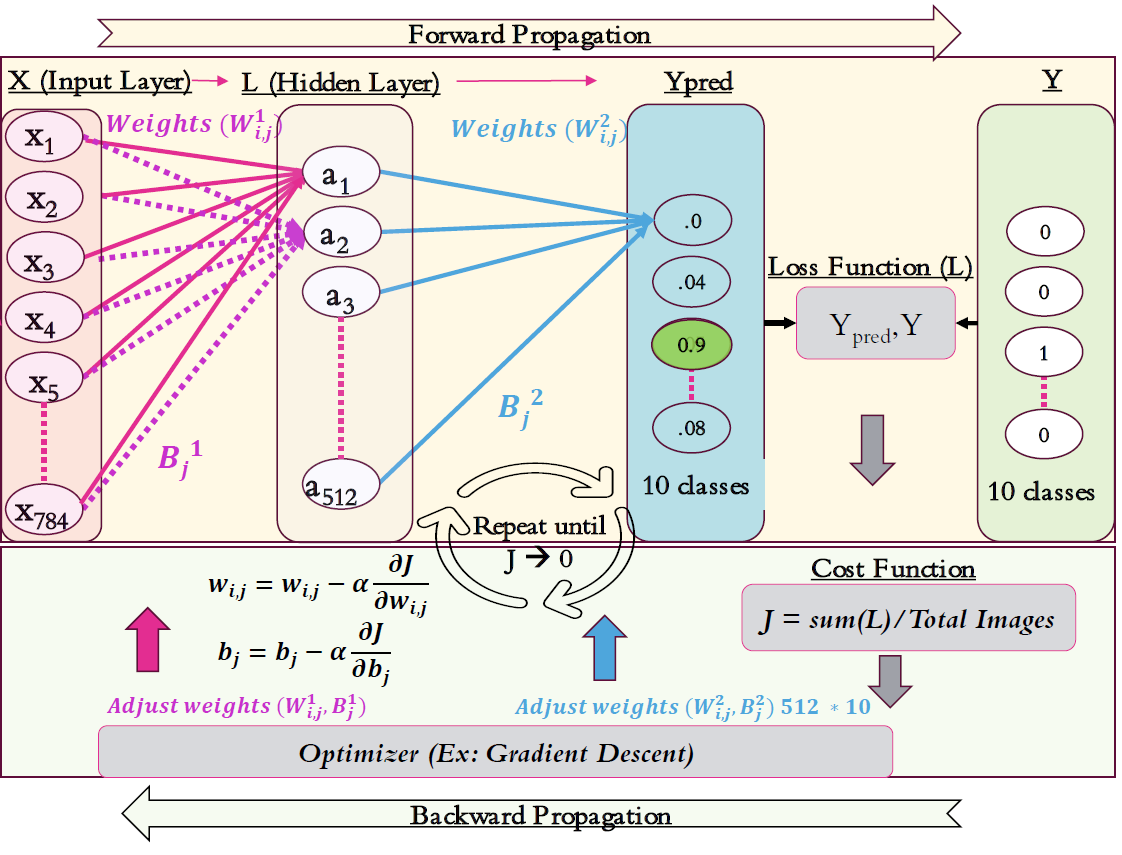

In [13]:
display(Image("./images/DL-Intuition3.png", width=800))

### Preprocess the Input Data

In [15]:
# Prepare the data into a format this simple model expects it to be
#-------------------------------------------------------------
# Flatten the 2D Pixel image into a 1D vector (reshape) 28 * 28 = 784
# Convert the data type into float (astype) from integer
# Divide by 255.0, so that all the pixel values are scaled between 0 and 1

# Preprocess Training data
train_images = train_images.reshape((60000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
train_images = train_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]

#Preprocess Test data
test_images = test_images.reshape((10000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
test_images = test_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]

### Build the Neural Network Model Architecture

In [16]:
# Build the model's neural network architecture
model = keras.Sequential() # Start building a Sequential keras model
model.add(layers.Dense(512,activation='relu')) # Add first layer with 512 Hidden Units, and use Relu for nonlinear activation
model.add(layers.Dense(10,activation = "softmax")) # Last output layer which will be softmax classification.
# Above layer outputs 10 probabilities summing to 1. Each probability that the predicted image belongs to one of 10 classes.

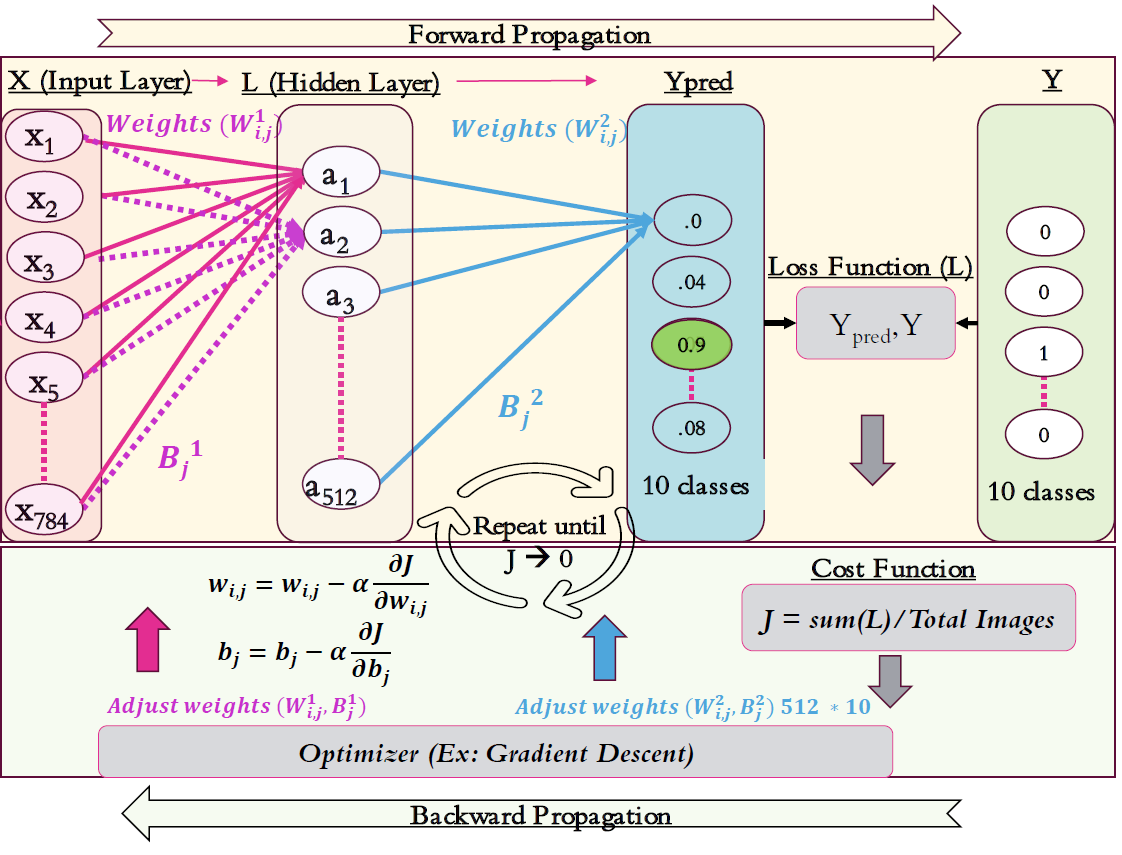

In [14]:
display(Image("./images/DL-Intuition3.png", width=500))

### Compile the Model

In [17]:
#Compile the Model by configuring the  loss function, optimizer type, & metrics to monitor the model performance
# It uses rmsprop algorithm  for gradient decent optimization
# Loss is calculated from 'sparse_categorical_crossentropy'
# Metric for monitoring model performance: "accuracy"

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

#for the loss, use "sparse_categorical_crossentropy" if u have not one-hot encoded ur training labels (Y). 
# If you have one-hot encoded the training labels (Y), then use categorical_crossentropy

### Train the Model 
**Basically fit the model on Training data (X: Train_images), (Y: train_labels)**

In [18]:
# Model fits the training data: Maps X --> Y and learns Optimal weights that satisfy this relationship
#------------------------------------------------------------------------------------------------------
#.fit method orchestrates the entire training process, including the 
# forward pass (to make predictions), 
# the backward pass (to compute gradients), which includes the optimization step (to update the weights, i.e., perform the gradient descent step).

# The actual mathematical operations for gradient computation and weight update are handled by the backend (like TensorFlow), 
# ..and the fit method provides a high-level API for managing this process.

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 6ms/step - loss: 0.5613 - accuracy: 0.7997
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3790 - accuracy: 0.8612
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.8754
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3090 - accuracy: 0.8867
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2911 - accuracy: 0.8933


## Evaluate the trained model on previously unseen test data - 1 line of Code

In [19]:
model.evaluate(test_images, test_labels) # one line of code to test the model performance on entire test data

313/313 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.8765


[0.35381248593330383, 0.8765000104904175]

### Model Predictions on individual images

In [20]:
# Once the model has learnt, or has become smarter we can use it to make predictions on unseen data

Actual Ground Trust Label for This image: 9


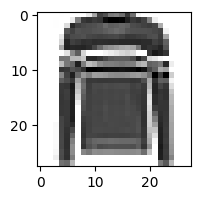

In [27]:
# lets look at first test image
print ('Actual Ground Trust Label for This image:', test_labels[0])
plt.figure(figsize=(2, 2), dpi=100)  
plt.imshow(train_images[5].reshape(28,28), cmap="binary", interpolation='nearest')
plt.show()

**Lets see how good the model is in predicting this first test image**

In [22]:
# Model is predicting the probabilities that this each image belongs to each of the 10 different image labels we have
# 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat"
# 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8: "Bag", "9:Ankle boot"

pred_probabilities = model.predict(test_images[0:1]) 
pred_probabilities.round(3)

1/1 [==============================] - 0s 135ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.005, 0.   ,
        0.992]], dtype=float32)

In [23]:
# Model Prediction 
print ("Model predicted label for the first test image is", np.argmax(model.predict(test_images[0:1])))

1/1 [==============================] - 0s 30ms/step
Model predicted label for the first test image is 9


In [ ]:
# 9th index position in the above array has the highest probability, 
# This indicates that the model is predicting that the first test image (test_image[0]) belongs to class 9

## Congratulations, you just built your first Deep Learning Model
###  You have trained & developed an Image classifier that can automatically recognize different fashion items in just 9 lines of code
### Evaluated the Models performance on unseen test data